Считываем данные из файла pulse.txt, содержащего показатели пульса для четырех групп: CB (пациенты до), EB (здоровые до), CA (пациенты после), EA (здоровые после). Удаляем строки с пропущенными значениями, чтобы обеспечить корректность анализа.

Простыми словами:

Открываем файл с данными о пульсе и убираем пустые ячейки, чтобы всё работало правильно.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
pulse_path = '/content/drive/MyDrive/Colab Notebooks/5lab/pulse.txt'
data = pd.read_csv(pulse_path, sep='\s+')
data = data.dropna()

Mounted at /content/drive


Проверяем нормальность распределения для каждой группы (CB, EB, CA, EA) с помощью теста Шапиро-Уилка. Тест вычисляет статистику W и p-value. Если p-value > 0.05, гипотеза о нормальности не отвергается(смотрим, похожи ли данные о пульсе на нормальный колокол)

In [3]:
import scipy.stats as stats
def check_normality(column, name):
    stat, p = stats.shapiro(column)
    print(f'{name}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print(f'{name} распределение нормальное')
    else:
        print(f'{name} распределение не нормальное')
print("Проверка на нормальность:")
check_normality(data['CB'], 'CB (пациенты до)')
check_normality(data['EB'], 'EB (здоровые до)')
check_normality(data['CA'], 'CA (пациенты после)')
check_normality(data['EA'], 'EA (здоровые после)')

Проверка на нормальность:
CB (пациенты до): Statistics=0.971, p-value=0.556
CB (пациенты до) распределение нормальное
EB (здоровые до): Statistics=0.957, p-value=0.253
EB (здоровые до) распределение нормальное
CA (пациенты после): Statistics=0.919, p-value=0.026
CA (пациенты после) распределение не нормальное
EA (здоровые после): Statistics=0.906, p-value=0.012
EA (здоровые после) распределение не нормальное


Сравниваем группы "до" и "после" для здоровых (EB vs EA) и пациентов (CB vs CA) с помощью парного t-теста (ttest_rel), так как данные парные (одни и те же люди до и после). Тест вычисляет статистику t и p-value. Если p-value < 0.05, есть значимые различия. Построим коробки с усами для визуализации распределений.


Сравнение групп до и после:
Здоровые (EB vs EA): T-test: Statistics=5.704, p-value=0.000
Есть значимые различия в группах Здоровые (EB vs EA)
Пациенты (CB vs CA): T-test: Statistics=1.137, p-value=0.265
Нет значимых различий в группах Пациенты (CB vs CA)


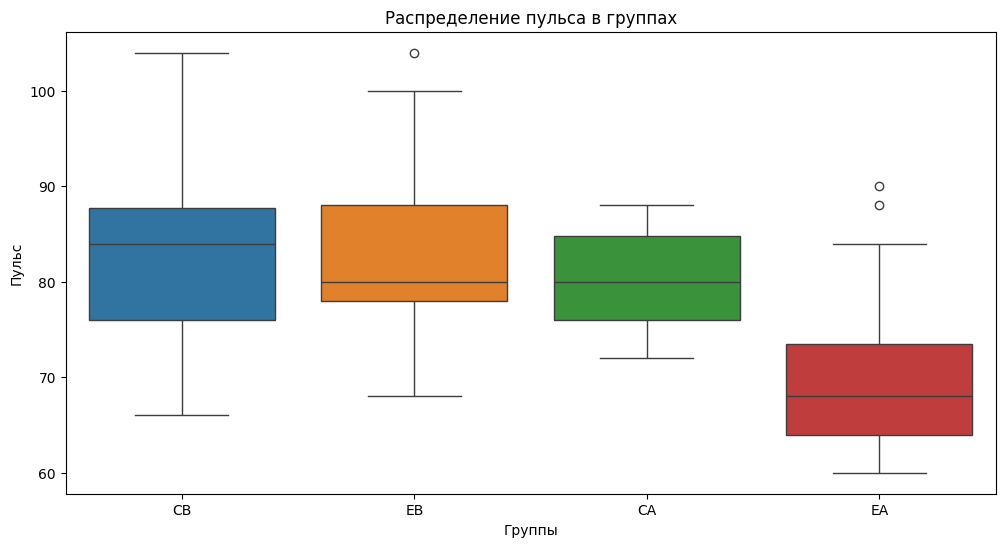

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
def compare_groups(before, after, name):
    t_stat, p_value = stats.ttest_rel(before, after)
    print(f'{name}: T-test: Statistics={t_stat:.3f}, p-value={p_value:.3f}')
    if p_value > 0.05:
        print(f'Нет значимых различий в группах {name}')
    else:
        print(f'Есть значимые различия в группах {name}')
print("\nСравнение групп до и после:")
compare_groups(data['EB'], data['EA'], 'Здоровые (EB vs EA)')
compare_groups(data['CB'], data['CA'], 'Пациенты (CB vs CA)')
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['CB', 'EB', 'CA', 'EA']])
plt.title('Распределение пульса в группах')
plt.xlabel('Группы')
plt.ylabel('Пульс')
plt.show()

Сравниваем группы здоровых и пациентов в каждом состоянии: "до" (EB vs CB) и "после" (EA vs CA). Используем t-тест для независимых выборок (ttest_ind), так как группы разные. Если нормальность не подтверждена, можно использовать непараметрический тест Уилкоксона, но предположим нормальность для простоты. Построим коробки с усами для визуализации.

Простыми словами, Смотрим, отличается ли пульс здоровых от пациентов до и после лекарства. Коробки покажут, как данные распределены.


Сравнение здоровых и пациентов:
До (EB vs CB): T-test: Statistics=-0.066, p-value=0.948
Нет значимых различий в группах До (EB vs CB)
После (EA vs CA): T-test: Statistics=-5.624, p-value=0.000
Есть значимые различия в группах После (EA vs CA)


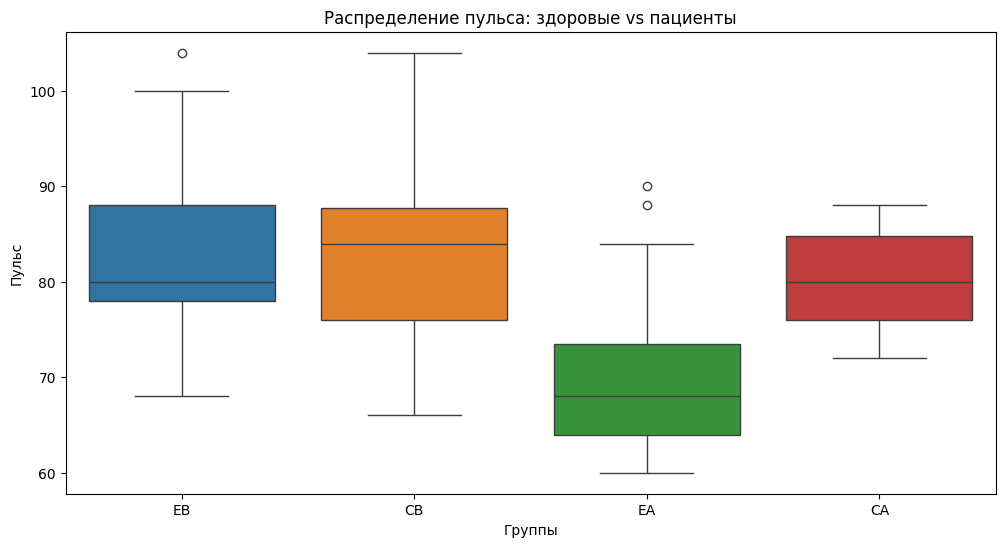

In [5]:
def compare_independent_groups(group1, group2, name):
    t_stat, p_value = stats.ttest_ind(group1, group2)
    print(f'{name}: T-test: Statistics={t_stat:.3f}, p-value={p_value:.3f}')
    if p_value > 0.05:
        print(f'Нет значимых различий в группах {name}')
    else:
        print(f'Есть значимые различия в группах {name}')
print("\nСравнение здоровых и пациентов:")
compare_independent_groups(data['EB'], data['CB'], 'До (EB vs CB)')
compare_independent_groups(data['EA'], data['CA'], 'После (EA vs CA)')
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['EB', 'CB', 'EA', 'CA']])
plt.title('Распределение пульса: здоровые vs пациенты')
plt.xlabel('Группы')
plt.ylabel('Пульс')
plt.show()

Делаем выводы об эффективности лекарства на основе результатов t-тестов. Если p-value для CB vs CA < 0.05 и медиана пульса в CA ниже, чем в CB, лекарство снижает пульс у пациентов. Сравнение EB vs EA покажет, влияет ли лекарство на здоровых. Сравнение здоровых и пациентов уточнит различия.

In [6]:
print("\nВыводы об эффективности лекарства:")
if stats.ttest_rel(data['CB'], data['CA']).pvalue < 0.05 and data['CA'].median() < data['CB'].median():
    print("Лекарство эффективно: пульс у пациентов значительно снизился.")
else:
    print("Лекарство не показало значимой эффективности для пациентов.")
if stats.ttest_rel(data['EB'], data['EA']).pvalue < 0.05:
    print("Лекарство влияет на пульс здоровых людей.")
else:
    print("Лекарство не влияет на пульс здоровых людей.")


Выводы об эффективности лекарства:
Лекарство не показало значимой эффективности для пациентов.
Лекарство влияет на пульс здоровых людей.


Считываем данные из grades.txt, явно задавая имена столбцов ("Группа 1", "Группа 2", "Группа 3", "Группа 4") для корректного распознавания групп. Преобразуем данные в длинный формат, где каждая строка содержит группу и оценку. Формируем таблицу сопряженности, отображающую частоты оценок (3, 4, 5) для каждой группы.

In [19]:
grades_path = '/content/drive/MyDrive/Colab Notebooks/5lab/grades.txt'  # Твой путь
data_grades = pd.read_csv(grades_path, sep='\s+', encoding='utf-16', header=0)
data_long = data_grades.melt(var_name='Группа', value_name='Оценка')
data_long['Оценка'] = data_long['Оценка'].astype(float)  # Гарантируем числовой формат
contingency_table = pd.crosstab(data_long['Группа'], data_long['Оценка'])
print("Таблица сопряженности:")
print(contingency_table)

Таблица сопряженности:
Оценка    3.0  4.0  5.0
Группа                 
1          12   15    3
2           4    7   19
Группа     17   11    2
Группа.1   13   12    5


Проверяем гипотезу об отсутствии связи между группой и оценкой с помощью критерия хи-квадрат. Тест вычисляет статистику χ² и p-value. Если p-value < 0.05, гипотеза об отсутствии связи отвергается. Критерий Фишера не используем, так как выборка достаточно большая.

In [20]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nХи-квадрат: {chi2:.3f}")
print(f"p-value: {p:.3f}")
if p > 0.05:
    print("Нет значимой статистической связи между группами и оценками.")
else:
    print("Есть значимая статистическая связь между группами и оценками.")


Хи-квадрат: 36.685
p-value: 0.000
Есть значимая статистическая связь между группами и оценками.
